In [173]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 2)

Populating the interactive namespace from numpy and matplotlib


/home/jon/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sin', 'sqrt', 'cos', 'radians', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
# https://catalogodatos.gub.uy/dataset/horarios-omnibus-urbanos-por-parada-stm
bus_schedules_by_stops = pd.read_csv('files/uptu_pasada_variante.csv',sep=';')
bus_schedules_by_stops.head()

,tipo_dia,cod_variante,frecuencia,cod_ubic_parada,ordinal,hora,dia_anterior
0,1,7929,9230,6301,1,923,N
1,1,7929,9230,6196,2,924,N
2,1,7929,9230,2315,3,925,N
3,1,7929,9230,2316,4,926,N
4,1,7929,9230,2317,5,926,N


In [50]:
# https://catalogodatos.gub.uy/dataset/transporte-colectivo-paradas-y-puntos-de-control
stops_ubication = gpd.read_file('files/v_uptu_paradas.shx')
stops_ubication = pd.DataFrame(stops_ubication)
stops_ubication.head()
#stops_ubication.query('COD_UBIC_P ==2447 and COD_VARIAN==1276' )
#stops_ubication.query('COD_UBIC_P ==4212 and COD_VARIAN==170' )

,COD_UBIC_P,DESC_LINEA,COD_VARIAN,ORDINAL,CALLE,ESQUINA,COD_CALLE1,COD_CALLE2,X,Y,geometry
0,546.0,144,883,43,CORUÃA,PURIFICACION,2187,5733,578023.60011,6.140711e+06,POINT (578023.60011 6140711.3452)
1,546.0,144,3225,45,CORUÃA,PURIFICACION,2187,5733,578023.60011,6.140711e+06,POINT (578023.60011 6140711.3452)
2,547.0,144,883,44,CORUÃA,SAN ANTONIO,2187,6279,577944.25345,6.140829e+06,POINT (577944.25345 6140828.51804)
3,547.0,144,3225,46,CORUÃA,SAN ANTONIO,2187,6279,577944.25345,6.140829e+06,POINT (577944.25345 6140828.51804)
4,548.0,144,888,20,CORUÃA,SAN ANTONIO,2187,6279,577926.50589,6.140845e+06,POINT (577926.50589 6140844.77825)


In [51]:
# https://catalogodatos.gub.uy/dataset/transporte-colectivo-paradas-y-puntos-de-control
recorridos_omnibus = gpd.read_file('files/v_uptu_lsv.dbf')
recorridos_omnibus = pd.DataFrame(recorridos_omnibus)
recorridos_omnibus.head()

,GID,COD_LINEA,DESC_LINEA,ORDINAL_SU,COD_SUBLIN,DESC_SUBLI,COD_VARIAN,DESC_VARIA,geometry
0,16009404.0,0,LINEA CERO,1,0,SUBLINEA CERO,0,None,None
1,16009406.0,1,402,1,1,CIUDAD VIEJA - MALVIN,8,A,None
2,16009407.0,2,404,1,2,CJO.J.AMÃRICA - PCIO.DE LA LUZ,14,B,None
3,16009408.0,2,404,1,2,CJO.J.AMÃRICA - PCIO.DE LA LUZ,20,A,None
4,16009409.0,3,405,1,3,PEÃAROL - PARQUE RODÃ,24,B,None


In [52]:
# https://catalogodatos.gub.uy/dataset/transporte-colectivo-paradas-y-puntos-de-control
ubicacion_puntos_control = gpd.read_file('files/v_uptu_controles.dbf')
ubicacion_puntos_control = pd.DataFrame(ubicacion_puntos_control)
ubicacion_puntos_control.head()

,COD_UBIC_C,DESC_LINEA,COD_VARIAN,ORDINAL,DESC_UBIC_,COD_CALLE1,COD_CALLE2,X,Y,geometry
0,1,402,1,10,MALVIN,7569,240,581831.105002,6.138254e+06,None
1,1,G,3401,2,MALVIN,7569,240,581831.105002,6.138254e+06,None
2,1,G,3402,11,MALVIN,7569,240,581831.105002,6.138254e+06,None
3,1,2,7565,2,MALVIN,7569,240,581831.105002,6.138254e+06,None
4,1,2,7566,8,MALVIN,7569,240,581831.105002,6.138254e+06,None


In [53]:
# https://catalogodatos.gub.uy/dataset/lineas-omnibus-origen-y-destino
origen_destino_lineas = gpd.read_file('files/v_uptu_lsv_destinos.dbf')
origen_destino_lineas = pd.DataFrame(origen_destino_lineas)
origen_destino_lineas.head()

,GID,COD_LINEA,DESC_LINEA,ORDINAL_SU,COD_SUBLIN,DESC_SUBLI,COD_VARIAN,DESC_VARIA,COD_VAR_01,COD_ORIGEN,DESC_ORIGE,COD_DESTIN,DESC_DESTI,geometry
0,16009406.0,1,402,1,1,CIUDAD VIEJA - MALVIN,8,A,NaN,19,PLAYA MALVÃN,23,CIUDAD VIEJA,None
1,16009407.0,2,404,1,2,CJO.J.AMÃRICA - PCIO.DE LA LUZ,14,B,NaN,69,PALACIO DE LA LUZ,47,COMPLEJO JUANA DE AMÃRICA,None
2,16009408.0,2,404,1,2,CJO.J.AMÃRICA - PCIO.DE LA LUZ,20,A,NaN,47,COMPLEJO JUANA DE AMÃRICA,69,PALACIO DE LA LUZ,None
3,16009409.0,3,405,1,3,PEÃAROL - PARQUE RODÃ,24,B,NaN,56,PARQUE RODÃ,74,PEÃAROL,None
4,16009410.0,3,405,2,246,GRUTA DE LOURDES - PARQUE RODO,28,B,NaN,56,PARQUE RODÃ,5,GRUTA DE LOURDES,None


In [54]:
# https://catalogodatos.gub.uy/dataset/lineas-omnibus-origen-y-destino
recorridos_variantes_no_maximales = gpd.read_file('files/uptu_variante_no_maximal.dbf')
recorridos_variantes_no_maximales = pd.DataFrame(recorridos_variantes_no_maximales)
recorridos_variantes_no_maximales.head()

#stops_ubication.query('COD_UBIC_P ==2447 and COD_VARIAN==1276' )


,GID,COD_VARIAN,COD_VAR_01,DESC_VARIA,COD_UBIC_P,COD_UBI_01,ORDINAL_OR,ORDINAL_DE,geometry
0,46204183.0,5,1,B,6092.0,3252.0,50,73,None
1,46204184.0,6,1,B,3520.0,3252.0,30,73,None
2,46204185.0,7,1,B,4041.0,2912.0,1,66,None
3,46204186.0,15,14,B,3922.0,3207.0,1,39,None
4,46204187.0,17,14,B,6091.0,2474.0,40,47,None


In [149]:
# https://catalogodatos.gub.uy/dataset/lineas-omnibus-origen-y-destino
transfers = pd.read_csv('files/trasbordos.csv',sep=',')

#transfers['stop_line_1'] = transfers['stop_id_1'] + transfers['line_id_1'] 
transfers.head()


,stop_id_1,stop_id_2,line_id_1,line_id_2,n_transfers
0,2427,2426,1096,2579,309
1,1885,4468,1759,1667,204
2,1108,4775,1122,650,186
3,1942,4399,1759,987,165
4,4212,5709,170,2579,149


## comienza el procesameinto >>>>>>>>>>>>>>>>>>>>

SALIDA: que son??

4 3 //cantidad_de_lineas puntos_sincro

1 2 2 100 3 10 15 16 0 // linea1 linea2 dist_entre_paradas P wb Wb TTl1 TTl2 es_bachin

2 3 1  50 5  8 18 22 0

3 4 1  75 5  8 18 22 0

5 15

4 12

4 10

4 10


DEFINED CONSTANTS

In [203]:
#range of hours considered
lower_limit_time_range=1300
upper_limit_time_range=2000

merge transfers with no maximal lines

In [150]:
transfers_with_no_max = transfers.copy()
transfers_with_no_max =  pd.merge(transfers_with_no_max, recorridos_variantes_no_maximales, 
                 how='left', left_on=['line_id_1'], right_on=['COD_VARIAN'])
transfers_with_no_max = transfers_with_no_max[['stop_id_1','stop_id_2',
                                               'line_id_1','line_id_2','n_transfers',
                                              'COD_VAR_01',]]
transfers_with_no_max.columns = ['stop_id_1','stop_id_2',
                                               'line_id_1','line_id_2','n_transfers',
                                              'line_id_1_var_01',]

transfers_with_no_max =  pd.merge(transfers_with_no_max, recorridos_variantes_no_maximales, 
                 how='left', left_on=['line_id_2'], right_on=['COD_VARIAN'])
transfers_with_no_max = transfers_with_no_max[['stop_id_1','stop_id_2',
                                               'line_id_1','line_id_2','n_transfers','line_id_1_var_01',
                                              'COD_VAR_01',]]
transfers_with_no_max.columns = ['stop_id_1','stop_id_2',
                                               'line_id_1','line_id_2','n_transfers',
                                              'line_id_1_var_01','line_id_2_var_01',]

display(transfers_with_no_max.head(20))

,stop_id_1,stop_id_2,line_id_1,line_id_2,n_transfers,line_id_1_var_01,line_id_2_var_01
0,2427,2426,1096,2579,309,NaN,1311.0
1,1885,4468,1759,1667,204,NaN,NaN
2,1108,4775,1122,650,186,NaN,NaN
3,1942,4399,1759,987,165,NaN,982.0
4,4212,5709,170,2579,149,NaN,1311.0
5,2447,2437,1276,1092,148,1274.0,NaN
6,1599,5709,1438,2579,142,1434.0,1311.0
7,2427,2426,1096,1290,136,NaN,1282.0
8,1942,4848,1759,2422,131,NaN,1736.0
9,4843,4930,1122,1347,128,NaN,NaN


complete maximals

In [151]:
transfers_with_no_max['line_id_1_var_01'] =\
            transfers_with_no_max.apply(lambda e: e.line_id_1 
                                        if math.isnan(e.line_id_1_var_01)
                                        else e.line_id_1_var_01,axis = 1) 
    
transfers_with_no_max['line_id_2_var_01'] =\
            transfers_with_no_max.apply(lambda e: e.line_id_2 
                                        if math.isnan(e.line_id_2_var_01) 
                                        else e.line_id_2_var_01,axis = 1) 

display(transfers_with_no_max.head(20))


,stop_id_1,stop_id_2,line_id_1,line_id_2,n_transfers,line_id_1_var_01,line_id_2_var_01
0,2427,2426,1096,2579,309,1096.0,1311.0
1,1885,4468,1759,1667,204,1759.0,1667.0
2,1108,4775,1122,650,186,1122.0,650.0
3,1942,4399,1759,987,165,1759.0,982.0
4,4212,5709,170,2579,149,170.0,1311.0
5,2447,2437,1276,1092,148,1274.0,1092.0
6,1599,5709,1438,2579,142,1434.0,1311.0
7,2427,2426,1096,1290,136,1096.0,1282.0
8,1942,4848,1759,2422,131,1759.0,1736.0
9,4843,4930,1122,1347,128,1122.0,1347.0


calculate tt

In [217]:
#time1-time2
def diff(time1,time2):
    hours1 = time1 // 100
    minutes1 = time1 % 100
    hours2 = time2 // 100
    minutes2 = time2 % 100
    minutos_desde_la_cero_hora1=hours1*60+minutes1
    minutos_desde_la_cero_hora2=hours2*60+minutes2
    return minutos_desde_la_cero_hora2 - minutos_desde_la_cero_hora1

def ttaux(frecuencia,bus_in):
    bus=bus_in.copy()
    bus=bus[bus.ordinal == 1]
    bus=bus[bus['frecuencia'] ==  frecuencia]
    bus=bus[bus['tipo_dia'] ==  1]
    bus=bus[bus['dia_anterior'] ==  'N']
    bus=bus.iloc[0]
    #display(bus)
    #display(bus)
    return bus['hora'].copy()


def tt(linea,parada,bus_schedules_by_stops):

    #linea=170
    #parada=4212
    #display(linea)
    #display(parada)
    query='cod_variante=='+ str(linea)# +' and cod_ubic_parada == '+str(parada)
    bus_schedules_by_stops_aux = bus_schedules_by_stops.query(query).copy()
    aux1=bus_schedules_by_stops_aux.copy()
    
    query='cod_variante=='+ str(linea) +' and cod_ubic_parada == '+str(parada)
    aux2 = bus_schedules_by_stops.query(query).copy()
    
    #display(aux2)
    
    aux2 = aux2.query('tipo_dia == 1').copy()
       
    frecuencias_validas_horarios= aux1.query('ordinal==1 and hora >=' +
                                             str(lower_limit_time_range) +
                                            'and hora <= ' + str(upper_limit_time_range)
                                            )
    #display(frecuencias_validas_horarios.head())
    aux1 = aux1[aux1['frecuencia'].isin(frecuencias_validas_horarios['frecuencia'])]
    aux2 = aux2[aux2['frecuencia'].isin(frecuencias_validas_horarios['frecuencia'])]
    #aux2 = aux2.query('frecuencia == 7070')
    
    
    #display(aux2)
    aux2['hora_salida'] =\
    aux2.apply(lambda e: ttaux(e.frecuencia,aux1),axis = 1) 
    
    #display(aux2)
    aux2['TT'] =\
        aux2.apply(lambda e: diff(e.hora_salida,e.hora),axis = 1) 
    aux2 =\
    aux2.groupby(['tipo_dia','cod_variante','cod_ubic_parada']).mean().reset_index()
    query='cod_variante=='+ str(linea) +' and cod_ubic_parada == '+str(parada)+' and tipo_dia == 1 '
    return aux2.query(query)['TT']

    #return 1
#display(bus_schedules_by_stops_aux) [bus['line_id_1'] ==  170]
transfers_with_no_max2 = transfers_with_no_max#[transfers_with_no_max['line_id_1'] ==  170].copy()
transfers_with_no_max2['TT1'] =\
        transfers_with_no_max2.apply(lambda e: tt(e.line_id_1_var_01,e.stop_id_1,bus_schedules_by_stops),axis = 1).copy() 
transfers_with_no_max2['TT2'] =\
        transfers_with_no_max2.apply(lambda e: tt(e.line_id_2_var_01,e.stop_id_2,bus_schedules_by_stops),axis = 1).copy() 
    
    
display(transfers_with_no_max)
transfers_with_no_max = transfers_with_no_max2

#display(bus_schedules_by_stops.query('cod_variante==1667 and ordinal == 1'))




/home/jon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,stop_id_1,stop_id_2,line_id_1,line_id_2,n_transfers,line_id_1_var_01,line_id_2_var_01,TT1,TT2
0,2427,2426,1096,2579,309,1096.0,1311.0,21.44,21.43
1,1885,4468,1759,1667,204,1759.0,1667.0,17.89,0.00
2,1108,4775,1122,650,186,1122.0,650.0,20.20,15.00
3,1942,4399,1759,987,165,1759.0,982.0,25.89,12.00
4,4212,5709,170,2579,149,170.0,1311.0,21.24,12.00
5,2447,2437,1276,1092,148,1274.0,1092.0,54.50,39.92
6,1599,5709,1438,2579,142,1434.0,1311.0,34.00,12.00
7,2427,2426,1096,1290,136,1096.0,1282.0,21.44,23.00
8,1942,4848,1759,2422,131,1759.0,1736.0,25.89,1.00
9,4843,4930,1122,1347,128,1122.0,1347.0,22.20,15.67


merge transfers and stops ubication to get stops geometriy (coordinates)

In [187]:
transfers_with_stop_coors = transfers_with_no_max.copy()
transfers_with_stop_coors =  pd.merge(transfers_with_stop_coors, stops_ubication, 
                 how='left', left_on=['stop_id_1','line_id_1_var_01'], right_on=['COD_UBIC_P',
                                                                                 'COD_VARIAN'])


transfers_with_stop_coors = transfers_with_stop_coors[['line_id_1','line_id_2','stop_id_1',
                                                       'stop_id_2','line_id_1_var_01',
                                                         'line_id_2_var_01','n_transfers','geometry','TT1','TT2']]



transfers_with_stop_coors.columns = ['line_id_1','line_id_2','stop_id_1','stop_id_2',
                                     'line_id_1_var_01','line_id_2_var_01','n_transfers',
                                      'line_1_geometry','TT1','TT2']


transfers_with_stop_coors = pd.merge(transfers_with_stop_coors, stops_ubication, 
                 how='left', left_on=['stop_id_2','line_id_2_var_01'], right_on=['COD_UBIC_P',
                                                                                 'COD_VARIAN'])


transfers_with_stop_coors = transfers_with_stop_coors[['line_id_1','line_id_2','stop_id_1',
                                                       'stop_id_2','line_id_1_var_01',
                                                         'line_id_2_var_01','n_transfers',
                                                       'line_1_geometry','geometry','TT1','TT2']]

transfers_with_stop_coors = transfers_with_stop_coors[['line_id_1',
                                                         'line_id_2','n_transfers',
                                                         'line_1_geometry',
                                                         'geometry','TT1','TT2']]
transfers_with_stop_coors.columns = ['line_id_1',
                                    'line_id_2','n_transfers','line_1_geometry',
                                    'line_2_geometry','TT1','TT2']
display(transfers_with_stop_coors)

,line_id_1,line_id_2,n_transfers,line_1_geometry,line_2_geometry,TT1,TT2
0,1096,2579,309,POINT (574358.64012 6142007.80678),POINT (574335.992349177 6142073.73086134),23.65,21.53
1,1759,1667,204,POINT (579143.19729 6151045.05149),POINT (579003.43819 6150897.89783),18.23,0.00
2,1122,650,186,POINT (568274.43675 6140874.33485),POINT (568313.75044208 6140712.23252608),20.59,15.38
3,1759,987,165,POINT (576647.11472 6148135.18576),POINT (576591.86934 6148055.24203),26.23,12.00
4,170,2579,149,POINT (571782.139845352 6142120.25843186),POINT (571879.0758399999 6142165.71392),21.15,11.80
5,1276,1092,148,POINT (574419.2876644752 6142043.651997477),POINT (574338.72252 6141670.17293),48.25,38.17
6,1438,2579,142,POINT (571906.546542 6142246.919004),POINT (571879.0758399999 6142165.71392),34.00,11.80
7,1096,1290,136,POINT (574358.64012 6142007.80678),POINT (574335.992349177 6142073.73086134),23.65,23.69
8,1759,2422,131,POINT (576647.11472 6148135.18576),POINT (576793.9282862354 6147779.394846829),26.23,1.00
9,1122,1347,128,POINT (568550.168073634 6140749.17301807),POINT (568630.045883108 6140710.86058456),22.37,16.61


caculate distance between stops of lines

In [188]:
def dist(geometry_1,geometry_2):
    return geometry_1.distance(geometry_2)

transfers_with_stop_coors['dist'] =\
transfers_with_stop_coors.apply(lambda e:dist(e.line_1_geometry,e.line_2_geometry),axis = 1) 
transfers_with_stop_coors.head(20)

,line_id_1,line_id_2,n_transfers,line_1_geometry,line_2_geometry,TT1,TT2,dist
0,1096,2579,309,POINT (574358.64012 6142007.80678),POINT (574335.992349177 6142073.73086134),23.65,21.53,69.71
1,1759,1667,204,POINT (579143.19729 6151045.05149),POINT (579003.43819 6150897.89783),18.23,0.00,202.95
2,1122,650,186,POINT (568274.43675 6140874.33485),POINT (568313.75044208 6140712.23252608),20.59,15.38,166.80
3,1759,987,165,POINT (576647.11472 6148135.18576),POINT (576591.86934 6148055.24203),26.23,12.00,97.18
4,170,2579,149,POINT (571782.139845352 6142120.25843186),POINT (571879.0758399999 6142165.71392),21.15,11.80,107.06
5,1276,1092,148,POINT (574419.2876644752 6142043.651997477),POINT (574338.72252 6141670.17293),48.25,38.17,382.07
6,1438,2579,142,POINT (571906.546542 6142246.919004),POINT (571879.0758399999 6142165.71392),34.00,11.80,85.73
7,1096,1290,136,POINT (574358.64012 6142007.80678),POINT (574335.992349177 6142073.73086134),23.65,23.69,69.71
8,1759,2422,131,POINT (576647.11472 6148135.18576),POINT (576793.9282862354 6147779.394846829),26.23,1.00,384.89
9,1122,1347,128,POINT (568550.168073634 6140749.17301807),POINT (568630.045883108 6140710.86058456),22.37,16.61,88.59


intersection points

In [198]:
points = transfers_with_stop_coors[['line_id_1','line_id_2','dist','n_transfers','TT1','TT2']]
points.columns = ['line_i','line_j','dist','demand','TT_i','TT_j']
points.insert(4, 'wb',5)
points.insert(5, 'wB', 10)
#points.insert(6, 'TT_i', np.zeros(len(points)))
#points.insert(7, 'TT_j', np.zeros(len(points)))
points.insert(8, 'BP', np.zeros(len(points)))
points.head(20)

,line_i,line_j,dist,demand,wb,wB,TT_i,TT_j,BP
0,1096,2579,69.71,309,5,10,23.65,21.53,0.0
1,1759,1667,202.95,204,5,10,18.23,0.00,0.0
2,1122,650,166.80,186,5,10,20.59,15.38,0.0
3,1759,987,97.18,165,5,10,26.23,12.00,0.0
4,170,2579,107.06,149,5,10,21.15,11.80,0.0
5,1276,1092,382.07,148,5,10,48.25,38.17,0.0
6,1438,2579,85.73,142,5,10,34.00,11.80,0.0
7,1096,1290,69.71,136,5,10,23.65,23.69,0.0
8,1759,2422,384.89,131,5,10,26.23,1.00,0.0
9,1122,1347,88.59,128,5,10,22.37,16.61,0.0


frequency

In [193]:



#bus_schedules_by_stops 
def max_min_avg_line_frec( linea ,bus_schedules_by_stops,lower_limit_time_range,upper_limit_time_range):
    resultado=bus_schedules_by_stops.query('tipo_dia==1 and ordinal==1 and dia_anterior== "N" and cod_variante=='+str(linea)+' and hora>='+str(lower_limit_time_range)+' and hora<='+str(upper_limit_time_range))
    resultadoHoraTolistSinRepetidos=list(set(resultado.hora.tolist()))
    resultadoHoraTolistSinRepetidos = sorted(resultadoHoraTolistSinRepetidos)
    cant_rows = len(resultadoHoraTolistSinRepetidos)
    maxima_fecuencia = 0
    minima_frecuencia = 10000000
    lista_frecuencias_minutos_linea=[]
   # print(resultado)
    
    for i in range(cant_rows-1):
        time1=resultadoHoraTolistSinRepetidos[i]
        time2=resultadoHoraTolistSinRepetidos[i+1]
        hours1 = time1 // 100
        minutes1 = time1 % 100
        hours2 = time2 // 100
        minutes2 = time2 % 100
        minutos_desde_la_cero_hora1=hours1*60+minutes1
        minutos_desde_la_cero_hora2=hours2*60+minutes2
        resta = minutos_desde_la_cero_hora2-minutos_desde_la_cero_hora1
        lista_frecuencias_minutos_linea.append(resta)
        if(maxima_fecuencia<resta):
            maxima_fecuencia=resta
        #if(resta==1 and linea==1096):
        #    print(time1)
        #    print(time2)
        #    print(linea)    
    #elimina los duplicados    
    lista_frecuencias_minutos_linea = list(set(lista_frecuencias_minutos_linea)) 
   # print(lista_frecuencias_minutos_linea)
    #print(resultado)
    retornero =	{
      "min": min(lista_frecuencias_minutos_linea),
      "max": maxima_fecuencia,
      "avg": sum(lista_frecuencias_minutos_linea)/len(lista_frecuencias_minutos_linea)
    }
    return retornero

lista_min = []
lista_max = []
lista_avg = []
lineas_en_orden_procesado=[]



# list of used stops
aux_lines_i =  pd.DataFrame({'linea': points['line_i'] })
aux_lines_j =  pd.DataFrame({'linea': points['line_j'] })
aux_lines = aux_lines_i.append(aux_lines_j)
aux_lines = aux_lines.drop_duplicates(subset=None, keep='first', inplace=False)
frequency = aux_lines.copy()



for i in range(len(frequency)):
   lista_linea=frequency.linea.tolist()
   min_max_promedio= max_min_avg_line_frec(lista_linea[i],bus_schedules_by_stops,lower_limit_time_range,upper_limit_time_range)
   lista_min.append(min_max_promedio["min"])
   lista_max.append(min_max_promedio["max"])
   lista_avg.append(min_max_promedio["avg"])
   lineas_en_orden_procesado.append(lista_linea[i])
    
lineas_min_max_avg=pd.DataFrame({'linea': lineas_en_orden_procesado, 'h': lista_min, 'H': lista_max, 'avg': lista_avg})

frec_h_H_avg =  pd.merge(frequency, lineas_min_max_avg, 
                 how='left', left_on=['linea'], right_on=['linea'])

display(frec_h_H_avg)  

,linea,h,H,avg
0,1096,7,37,16.23
1,1759,17,49,24.90
2,1122,10,15,12.50
3,170,8,11,9.50
4,1276,2,14,7.20
5,1438,11,28,16.67
6,2579,5,19,10.00
7,1667,9,20,12.50
8,650,7,32,13.60
9,987,10,24,17.56


mapping

In [197]:
#recorrer frec_h_H_avg y agregar columna
#luego agregar nuevas columnas a points

plotting scenario

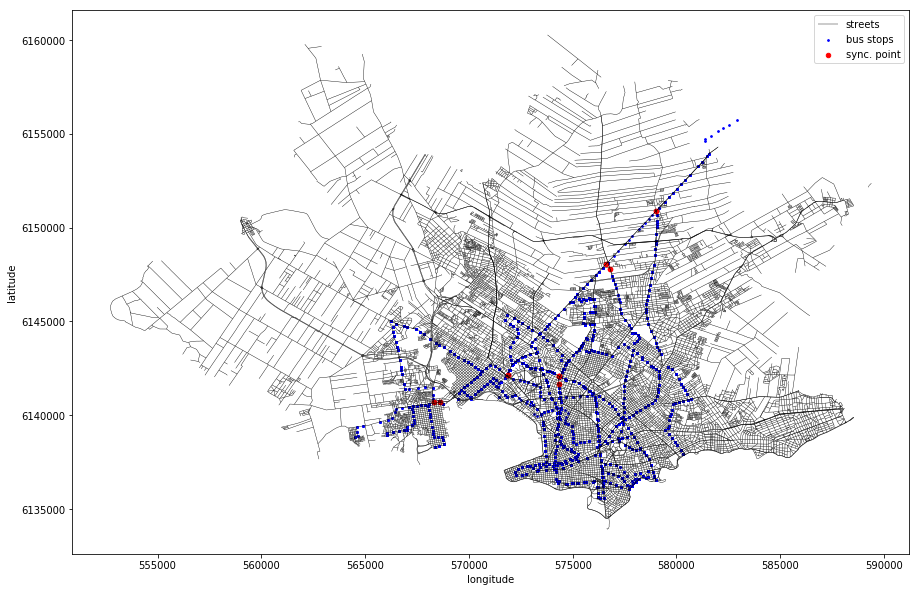

In [32]:

gdf_bus_stops=gpd.read_file("files/v_uptu_paradas/v_uptu_paradas.shp")
#gdf_bus_stops=gdf_bus_stops.to_crs(epsg=4326) 
gdf_streets=gpd.read_file("files/v_mdg_vias/v_mdg_vias.shp")
#gdf_streets=gdf_streets.to_crs(epsg=4326) 
bus_schedules_by_stops_aux = bus_schedules_by_stops.copy()
bus_schedules_by_stops_aux = bus_schedules_by_stops_aux.groupby(['cod_variante','cod_ubic_parada'], sort=False).max().reset_index()
bus_schedules_by_stops_aux = pd.merge(bus_schedules_by_stops_aux, frequency, 
                 how='right', left_on=['cod_variante'], right_on=['linea'])
gdf_bus_stops = pd.merge(gdf_bus_stops, bus_schedules_by_stops_aux, 
                 how='right', left_on=['COD_UBIC_P'], right_on=['cod_ubic_parada'])

geometry = transfers_with_stop_coors['line_1_geometry']
crs = {'init': 'epsg:4326'}
syncs1 = gpd.GeoDataFrame(transfers_with_stop_coors, crs=crs, geometry=geometry)
geometry = transfers_with_stop_coors['line_2_geometry']
crs = {'init': 'epsg:4326'}
syncs2 = gpd.GeoDataFrame(transfers_with_stop_coors, crs=crs, geometry=geometry)


fig, ax = plt.subplots(figsize=(15, 10))

gdf_streets.plot(ax=ax,
                linewidth=0.4,
                color="black",
                label="streets")


gdf_bus_stops.plot(ax=ax,
                   color="blue",
                markersize=3,
              label="bus stops")

syncs = syncs1.append(syncs2)

syncs.plot(ax=ax,
                   color="red",
                markersize=20,
              label="sync. point")


plt.legend()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.rcParams.update({'font.size': 12})
#display(gdf_bus_stops.head())


plt.savefig("figs/paradas_buses.png", bbox_inches='tight')




linea id de para que interesa

In [62]:
gdf_bus_stops.head()

#syncs.query('line_id_1 == 1096')
#display(transfers_with_no_max.query('line_id_1 == 1096'))

gdf_bus_stops.query('COD_VARIAN == 1096').sort_values(['hora'])
#bus_schedules_by_stops.query('cod_variante==1096')

#df.sort(['A', 'B'], ascending=[1, 0])


# hacer merge con esto
bus_schedules_by_stops.query('cod_variante==1096')

#gdf_bus_stops



,COD_UBIC_P,DESC_LINEA,COD_VARIAN,ORDINAL,CALLE,ESQUINA,COD_CALLE1,COD_CALLE2,X,Y,...,cod_variante,cod_ubic_parada,tipo_dia,frecuencia,ordinal,hora,dia_anterior,linea,h,H
0,553.0,494,129.0,92.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
1,553.0,495,141.0,89.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
2,553.0,143,881.0,16.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
3,553.0,185,1332.0,61.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
4,553.0,185,1347.0,63.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
5,553.0,186,1358.0,65.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
6,553.0,191,1391.0,33.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
7,553.0,192,1418.0,40.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
8,553.0,76,1630.0,69.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
9,553.0,328,1711.0,50.0,AV DR AMERICO RICALDONI,AV FEDERICO R VIDIELLA,5973.0,7268.0,577245.849701,6.138605e+06,...,1347,553,3,23280,63,2342,S,1347,0.0,0.0
